<a href="https://colab.research.google.com/github/AydaSalza/Project-Keamanan-dan-Integritas-Data/blob/main/TUGAS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("Tugas 1. Data sales.xlsx")

Saving Tugas 1. Data sales.xlsx to Tugas 1. Data sales (1).xlsx


# Struktur awal data

In [ ]:
df.head()

,QRTR,ORDERS 1,SALES 1,ORDERS 2,SALES 2,ORDERS 3,SALES 3
0,3,120.0,19610.0,27,3125.0,0,0.0
1,3,132.0,21573.0,28,2027.0,0,0.0
2,3,130.0,17917.0,34,2980.0,0,0.0
3,3,120.0,17572.0,30,3701.0,0,0.0
4,3,115.0,15154.0,37,2724.0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   QRTR      253 non-null    int64  
 1   ORDERS 1  252 non-null    float64
 2   SALES 1   252 non-null    float64
 3   ORDERS 2  253 non-null    int64  
 4   SALES 2   252 non-null    float64
 5   ORDERS 3  253 non-null    int64  
 6   SALES 3   251 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 14.0 KB


In [ ]:
df.describe()

,QRTR,ORDERS 1,SALES 1,ORDERS 2,SALES 2,ORDERS 3,SALES 3
count,253.000000,252.000000,252.000000,253.000000,252.000000,253.00000,251.000000
mean,2.509881,95.404762,14387.936508,45.588933,3966.484127,28.16996,2774.517928
std,1.118434,15.932966,4737.897129,9.967258,1532.720274,11.88932,1499.856565
min,1.000000,61.000000,4028.000000,15.000000,624.000000,0.00000,0.000000
25%,2.000000,85.000000,11108.000000,38.000000,2838.500000,24.00000,2080.500000
50%,3.000000,94.000000,13868.000000,46.000000,3877.500000,31.00000,2742.000000
75%,4.000000,103.000000,17465.750000,52.000000,4847.000000,35.00000,3605.500000
max,4.000000,151.000000,32892.000000,79.000000,10255.000000,52.00000,8228.000000


# Cek dan Penanganan Missing Value

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Missing_%': missing_percentage})
missing_df = missing_df.sort_values(by='Missing_%', ascending=False)
display(missing_df)

,Missing_Count,Missing_%
SALES 3,2,0.790514
ORDERS 1,1,0.395257
SALES 1,1,0.395257
SALES 2,1,0.395257


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

,0
QRTR,0
ORDERS 1,0
SALES 1,0
ORDERS 2,0
SALES 2,0
ORDERS 3,0
SALES 3,0


# Skewness

In [ ]:
df.skew()


,0
QRTR,-0.007776
ORDERS 1,0.671841
SALES 1,0.736085
ORDERS 2,0.076252
SALES 2,0.665753
ORDERS 3,-1.151052
SALES 3,0.276932


# Nilai Nol yang Tidak Wajar

In [ ]:
(df == 0).sum()

,0
QRTR,0
ORDERS 1,0
SALES 1,0
ORDERS 2,0
SALES 2,0
ORDERS 3,28
SALES 3,28


In [ ]:
df[(df['ORDERS 3'] == 0) & (df['SALES 3'] > 0)]

,QRTR,ORDERS 1,SALES 1,ORDERS 2,SALES 2,ORDERS 3,SALES 3


# Cek dan Penanganan Outlier

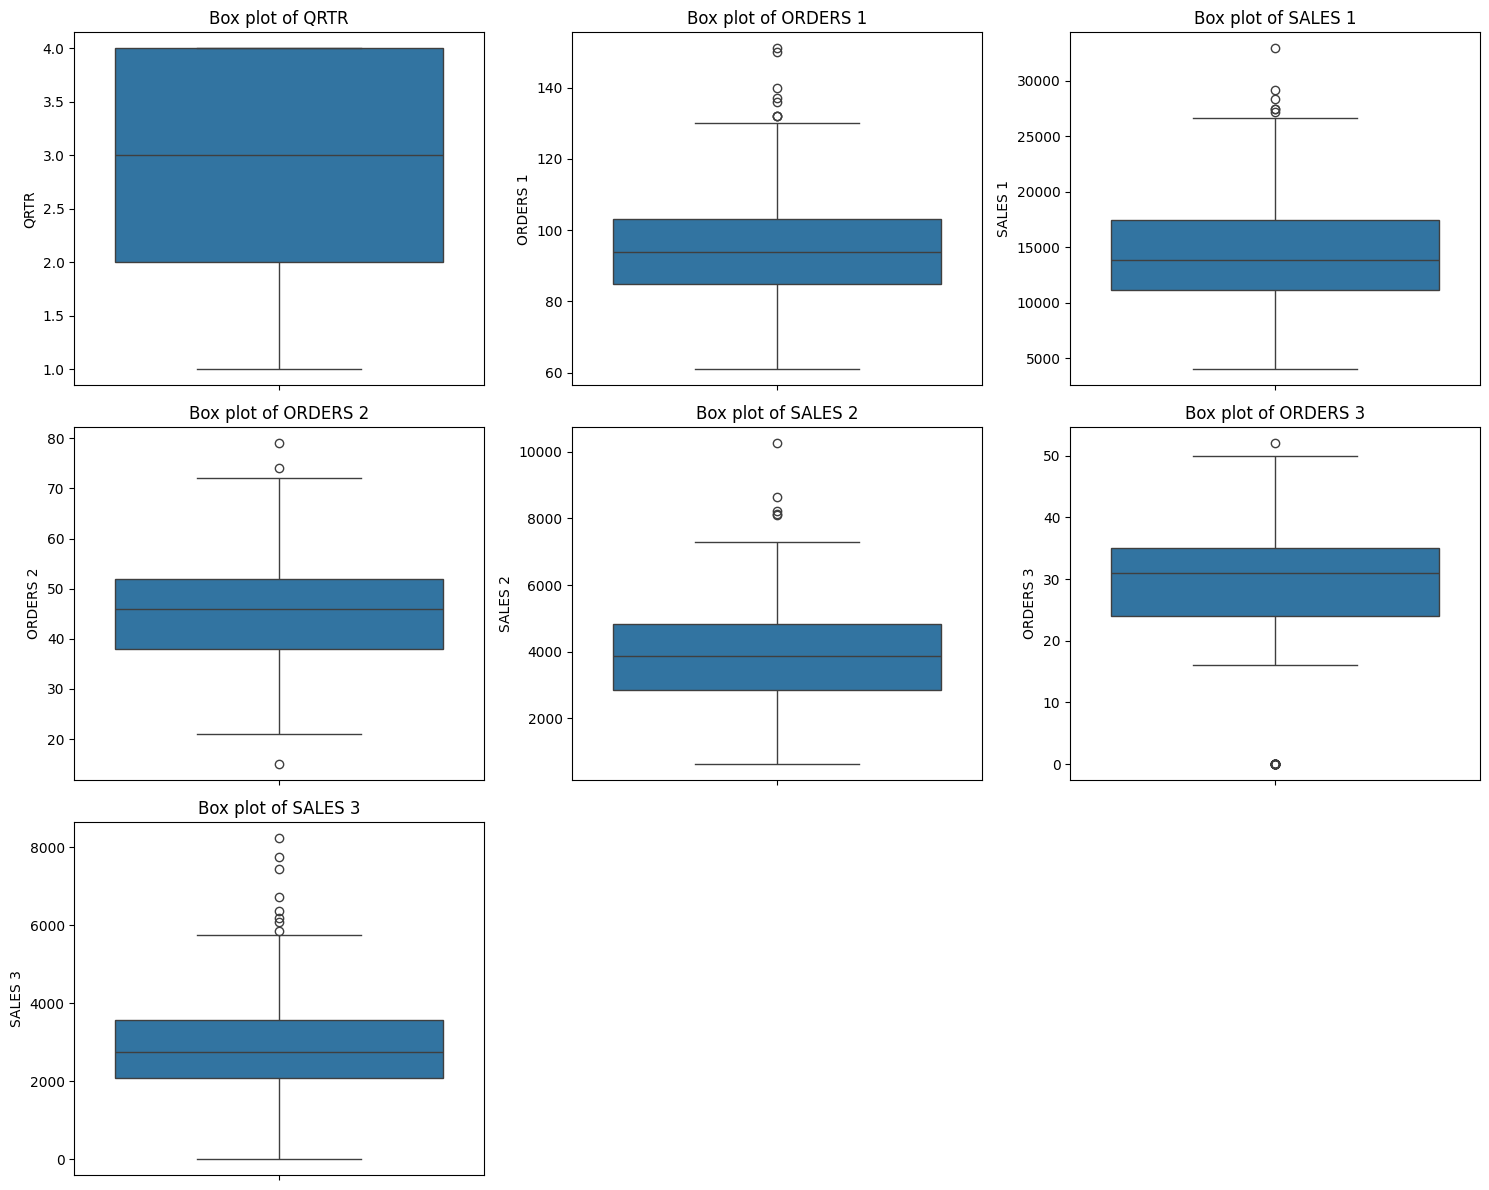

In [ ]:
# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 3  # You can adjust this based on how many plots you want per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size dynamically

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Nilai yang terdapat outlier telah ditangani dengan membati nilai-nilai tersebut")

Nilai yang terdapat outlier telah ditangani dengan membati nilai-nilai tersebut


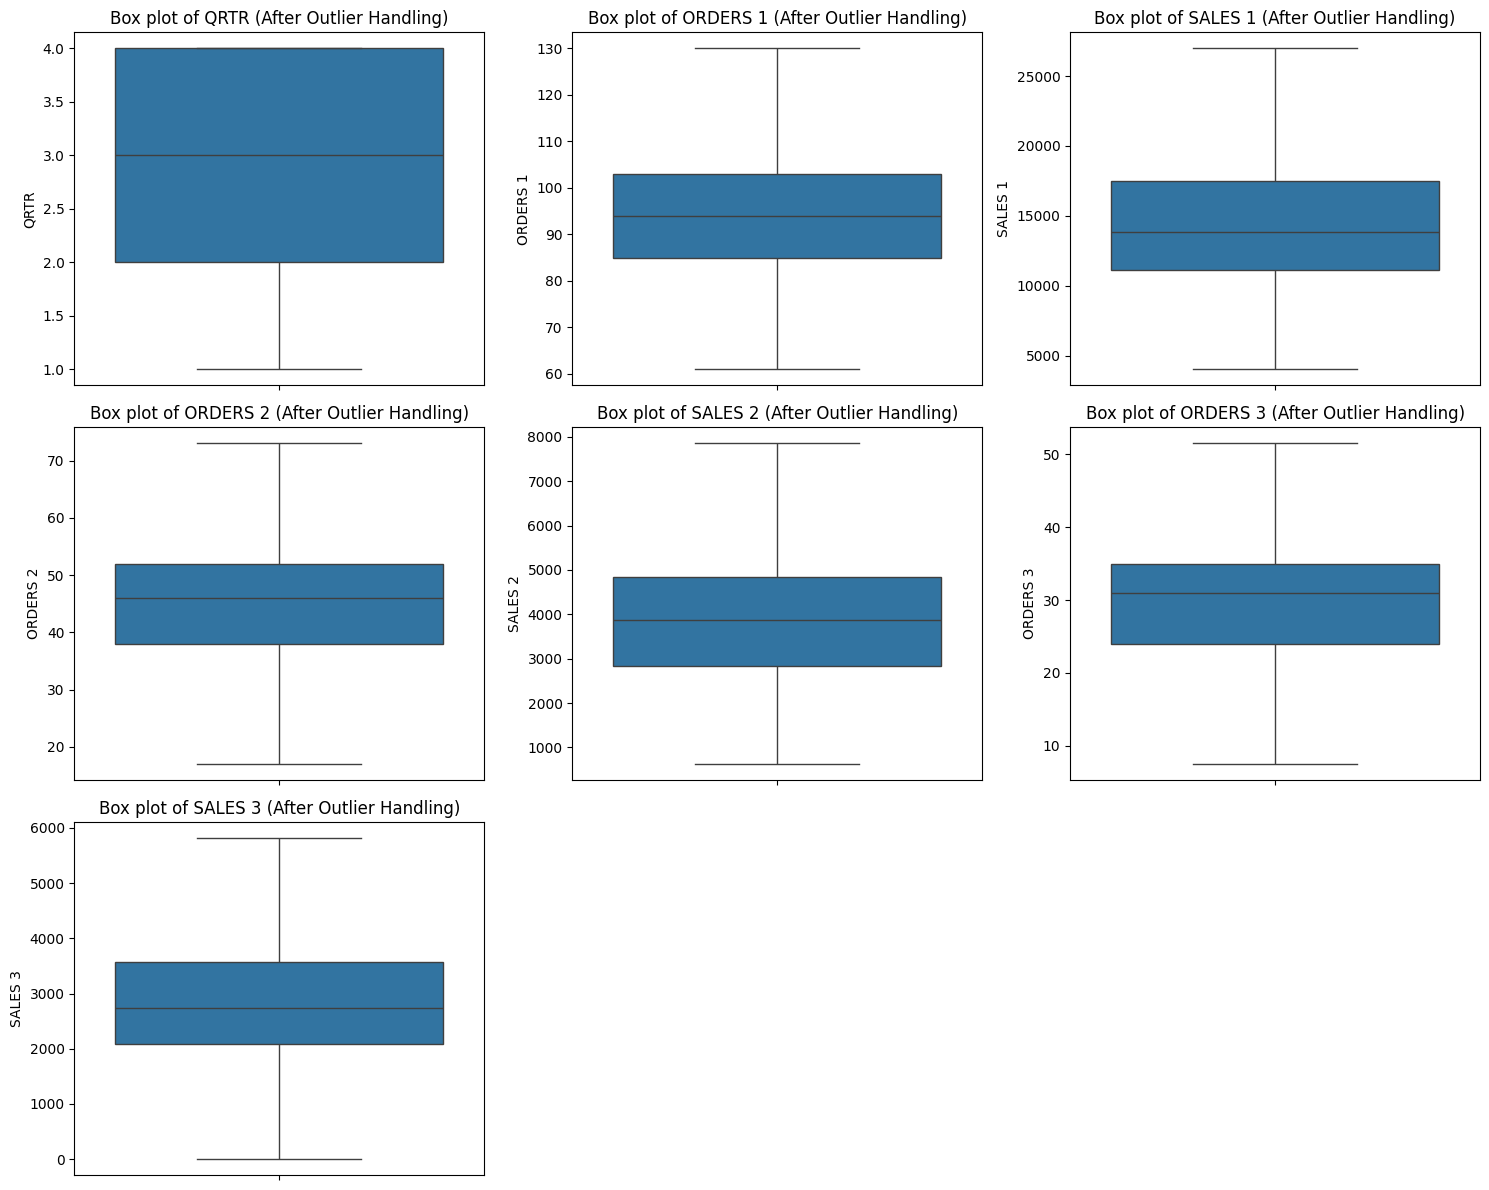

In [ ]:
# Identify numerical columns (already done in previous step, but re-defining for clarity)
num_cols = df.select_dtypes(include=np.number).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 3  # You can adjust this based on how many plots you want per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} (After Outlier Handling)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,QRTR,ORDERS 1,SALES 1,ORDERS 2,SALES 2,ORDERS 3,SALES 3
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,2.509881,95.122530,14344.620553,45.569170,3950.007905,28.998024,2741.956522
std,1.118434,15.147319,4598.741167,9.859336,1478.990980,9.993698,1406.970767
min,1.000000,61.000000,4028.000000,17.000000,624.000000,7.500000,0.000000
25%,2.000000,85.000000,11109.000000,38.000000,2841.000000,24.000000,2089.000000
50%,3.000000,94.000000,13868.000000,46.000000,3877.500000,31.000000,2742.000000
75%,4.000000,103.000000,17461.000000,52.000000,4846.000000,35.000000,3578.000000
max,4.000000,130.000000,26989.000000,73.000000,7853.500000,51.500000,5811.500000
